# Option Price and Probability Duality
- from https://www.youtube.com/watch?v=eG_aRPy1KVE

### Assets, all defined by their payouts, with maturity T and some underlying asset S

### Call Option
- Payout at T
\begin{equation*}
max(S_T-K, 0)
\end{equation*}
- Value (Payout) at t<=T
\begin{equation*}
C_K(t, T)
\end{equation*}

### Zero-Coupon Bond
- Payout at T
\begin{equation*}
1
\end{equation*}
- Value (Payout) at t<=T
\begin{equation*}
Z(t, T)
\end{equation*}

### Digital Option
- Value (Payout) at T
\begin{equation*}
I\{S_T > K\}
\end{equation*}
- Value at t<=T
\begin{equation*}
D_K(t, T)
\end{equation*}

---

##### Black-Scholes and other option pricing formula are all about determining price for $t < T$ 

---

#### Consider portfolio:
- $\lambda$ calls with strike $K$, -$\lambda$ calls with strike $K+\frac{1}{\lambda}$
- Price at t
    - $\lambda C_K(t, T) - \lambda C_{K+\frac{1}{\lambda}}(t, T)$
    - Notice this would give us $-\frac{\partial C_K(t,T)}{\partial K}$ as $\lambda$ -> $\infty$
    - and $-\frac{\partial C_K(t,T)}{\partial K}$ = $D_K(t, T) = Z(t, T)\mathbf{E}[I\{S_T>K\}] = Z(t, T)P(S_T>K)$
    - the expected value of the indicator function is the probability of the event
- Payout at T :

by the Fundamental Theorem of Asset Pricing: price at t is the expected payout at time T suitably discounted


In [46]:
import numpy as np
import pandas as pd
import oc
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# payout of a option at time T
def option_payout(K, quantity=1, call=True, S=None):
    # option to specify S, the potential ending stock values
    if S is None:
        print('default S')
        S = np.linspace(0, 2*K, 1000)
    if call:
        payout = np.multiply(quantity, [np.maximum(s-K, 0) for s in S])
    else:
        payout = np.multiply(quantity, [np.maximum(K-s, 0) for s in S])
    
    return pd.DataFrame(data={'Payout':payout}, index=S)

### Displaying the results of this function with a call options with strike price 100

default S


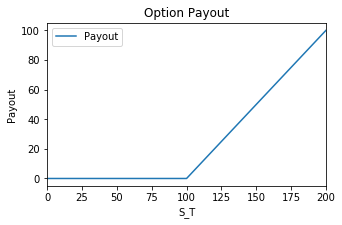

In [3]:
# payout of a call with a $100 strike price
payout = option_payout(100)

payout.plot(title='Option Payout', figsize=(5,3))
plt.ylabel('Payout')
plt.xlabel('S_T')
plt.show()

### Determining the payout of a portfolio with multiple options

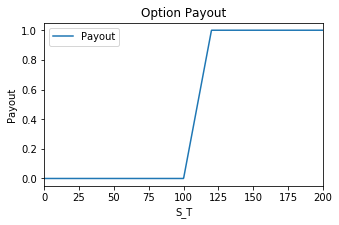

In [4]:
# payout of a portfolio with lambda calls with a $100 strike - lambda calls with a $100 + 1/lambda strike
l=0.05
K=100
S = np.linspace(0, 2*K, 1000)
asset1 = option_payout(100, quantity=l, S=S)
asset2 = option_payout(100+1/l, quantity=l, S=S)

# make sure to use the same S as index
portfolio = asset1 - asset2

portfolio.plot(title='Option Payout', figsize=(5,3))
plt.ylabel('Payout')
plt.xlabel('S_T')
plt.show()

### Creating a digital option with regular call options

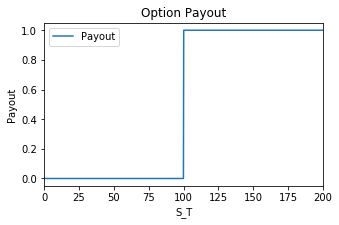

In [5]:
"""
let l -> infinity
payout converges to the digital payout
"""
# payout of a portfolio with lambda calls with a $100 strike - lambda calls with a $100 + 1/lambda strike
l=10000
K=100
S = np.linspace(0, 2*K, 1000)
asset1 = option_payout(100, quantity=l, S=S)
asset2 = option_payout(100+1/l, quantity=l, S=S)

# make sure I used the same S as index
portfolio = asset1 - asset2

portfolio.plot(title='Option Payout', figsize=(5,3))
plt.ylabel('Payout')
plt.xlabel('S_T')
plt.show()

from $-\frac{\partial C_K}{\partial K}$ = $D_K(t, T) = Z(t, T)\mathbf{E}[I\{S_T>K\} | S_t] = Z(t, T)P(S_T>K)$,
- we can see that the price of the digital is the probability of the event suitably discounted
- we also see that the derivative of the call price with respect to the strike price equals the discounted probability of the stock being above K
- We can reorganize this to get cumulative distribution function (which is $1-P(S_T>K | S_t)$)
- CDF: $P(S_T<K) = 1+\frac{\partial C_K(t,T)}{\partial K}\frac{1}{Z(t,T)}$
    - Differentiate the CDF to get the PDF
- Let $f_{S_T}(x)$ be the probability density function of random variable $S_T$, the the price of the stock at time $t=T$
    - $f_{S_T}(x) = \frac{\partial^{2} C_K}{Z(t,T)\partial K^{2}} |_x$
- We now have a linkage between the call price of options and the density of the random variable that is the underlying stock price at $t=T$
    - Given the set of call prices for all K, I can then uniquely determine the density of the underlying asset price at time $t=T$
        - {$C_K(t,T); \forall K$} $-> f_{S_T | S_t}(x)$

##### There's another way of accessing this probablity density function through another portfolio of options
##### Consider another portfolio:
- $\lambda$ calls with strike $K-\frac{1}{\lambda}$
- -2 $\lambda$ calls with strike $K$
- $\lambda$ calls with strike $K+\frac{1}{\lambda}$

This portfolio is called a call butterfly. The right scaling of this portfolio is going to approxiate the second derivative of the price of the call option w.r.t K, which is the same as approximating the density function.

The price of this portfolio is:
- Price = $\lambda(C_{K-\frac{1}{\lambda}}(t,T)-C_K(t,T)) -\lambda(C_K(t,T)-C_{K+\frac{1}{\lambda}}(t,T)) = B_{K,\lambda}(t,T)$
    - It's the difference between two call spreads. Price K centered at K with width $\frac{1}{\lambda}$
    - Take limits of this suitably scaled to get the second derivative
    
$\lambda B_{K,\lambda }(t,T) = \frac{\partial^{2} C_K(t,T)}{\partial K^{2}}$

For large $\lambda, B_{K,\lambda}(t,T) = \frac{1}{\lambda}f(x) |_K$

You say that the density function at x times a small interval gives you the probability of being in that interval
- People look at the prices of butterflies to get the probability of assets values ending up at around K at a given time.
    - Don't need any model for options prices for these relationships to hold.
    - If you were to put the Black-Scholes formula into C and take the second derivative wrt K, you'll end up with a log normal distribution

### Calculate the payout of a butteryfly spread

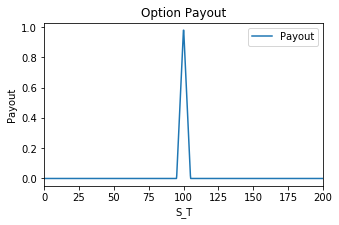

In [6]:
"""
let l -> infinity
try using different values of l (lambda). As lambda increases, the interval shrinks.
"""
# payout of a portfolio with lambda calls with a $100 strike - lambda calls with a $100 + 1/lambda strike
l=0.2
K=100
S = np.linspace(0, 2*K, 1000)
asset1 = option_payout(K=100-1/l, quantity=l, S=S)
asset2 = option_payout(K=100, quantity=l, S=S)
asset3 = option_payout(K=100+1/l, quantity=l, S=S)

# make sure I used the same S as index
portfolio = asset1 - 2*asset2 + asset3

portfolio.plot(title='Option Payout', figsize=(5,3))
plt.ylabel('Payout')
plt.xlabel('S_T')
plt.show()

### Pull data from a real option chain to see how much an asset like this would cost.

In [7]:
# debugging
print(pd.to_datetime(1580428800, unit='s'))
print(pd.to_datetime(1548892800, unit='s')) # I was off by a year....

2020-01-31 00:00:00
2019-01-31 00:00:00


In [167]:
# retrieve apple's option chain on Jan 31st 2020
aapl_oc = oc.get_options_chain('AAPL', date='2020-01-31')
calls = pd.DataFrame(aapl_oc['calls'])

1580428800
2020-01-31 00:00:00
https://finance.yahoo.com/quote/AAPL/options?p=AAPL&date=1580428800


In [168]:
# notice the last trade date here is at market close, so look at aapl's closing price to gauge current underlying stock (asset) price.
calls[calls['Strike'].between(300,330)]

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
36,AAPL200131C00300000,2020-01-24 9:51AM EST,300.0,23.40,23.25,23.60,2.11,+9.91%,118,22336,76.79%
37,AAPL200131C00302500,2020-01-23 3:52PM EST,302.5,20.10,21.10,21.30,1.20,+6.35%,7,1218,73.25%
38,AAPL200131C00305000,2020-01-24 9:50AM EST,305.0,19.00,19.05,19.30,1.88,+10.98%,315,2419,70.89%
39,AAPL200131C00307500,2020-01-24 9:52AM EST,307.5,17.20,17.05,17.30,1.90,+12.42%,59,1083,68.32%
40,AAPL200131C00310000,2020-01-24 9:51AM EST,310.0,15.30,15.10,15.35,1.75,+12.92%,216,3557,65.70%
41,AAPL200131C00312500,2020-01-24 9:49AM EST,312.5,13.35,13.55,13.65,1.50,+12.66%,166,3618,64.72%
42,AAPL200131C00315000,2020-01-24 9:51AM EST,315.0,11.90,11.85,11.95,1.51,+14.53%,597,4920,62.74%
43,AAPL200131C00317500,2020-01-24 9:50AM EST,317.5,10.38,10.40,10.45,1.45,+16.24%,940,4684,61.61%
44,AAPL200131C00320000,2020-01-24 9:51AM EST,320.0,8.95,8.90,9.00,1.30,+16.99%,3265,5205,59.88%
45,AAPL200131C00322500,2020-01-24 9:51AM EST,322.5,7.70,7.65,7.75,1.22,+18.83%,1497,2344,58.90%


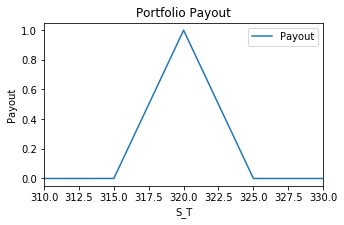

In [169]:
# AAPL's closing stock price on 2019-01-22 was 316.57. 
# So set K near 319.23 for the second asset.
# Set lambda to be 1/5 since the strikes are incremented by 5
# Note: they're actually incremented by 2.5, but those are less liquid
K = 320.0
l=1/5
S = np.linspace(K-2/l, K+2/l, 5000)

# Strike = 317.5
asset1_payout = option_payout(K=K-1/l, quantity=l, S=S)
# Strike = 320.0
asset2_payout = option_payout(K=K, quantity=l, S=S)
# Strike = 322.5
asset3_payout = option_payout(K=K+1/l, quantity=l, S=S)

# make sure I used the same S as index
portfolio_payout = asset1_payout - 2*asset2_payout + asset3_payout

portfolio_payout.plot(title='Portfolio Payout', figsize=(5,3))
plt.ylabel('Payout')
plt.xlabel('S_T')
plt.show()

In [170]:
portfolio_payout[portfolio_payout['Payout']>0.01][::200]

,Payout
315.053011,0.010602
315.853171,0.170634
316.653331,0.330666
317.453491,0.490698
318.253651,0.650730
319.053811,0.810762
319.853971,0.970794
320.654131,0.869174
321.454291,0.709142
322.254451,0.549110


### How much would this portfolio cost? (Using bid and ask prices)

In [171]:
# buying 1 call with strike 315.0 at ask would cost
asset1_cost = float(calls[calls['Strike']==K-1/l]['Ask'].values)*l

# selling 2 calls with strike 317.5 at bid would generate
asset2_cost = float(calls[calls['Strike']==K]['Bid'].values)*l

# buying 1 call with strike 320.0 at ask would cost
asset3_cost = float(calls[calls['Strike']==K+1/l]['Ask'].values)*l

portfolio_cost = asset1_cost - 2*asset2_cost + asset3_cost

print(portfolio_cost)

0.13999999999999968


### How much would this portfolio cost? (Using "Last price" prices)

In [175]:
# buying 1 call with strike K-1/l at last price would cost
asset1_cost = float(calls[calls['Strike']==K-1/l]['Last Price'].values)*l

# selling 2 calls with strike K at last price would generate
asset2_cost = float(calls[calls['Strike']==K]['Last Price'].values)*l

# buying 1 call with strike K+1/l at last price would cost
asset3_cost = float(calls[calls['Strike']==K+1/l]['Last Price'].values)*l

portfolio_cost = asset1_cost - 2*asset2_cost + asset3_cost

print(portfolio_cost)

0.11000000000000032


### How much would this portfolio cost? (Using "(Bid+Ask)/2" prices)

In [176]:
# buying 1 call with strike 315.0 at ask would cost
asset1_cost = (calls[calls['Strike']==K-1/l]['Bid'].values+calls[calls['Strike']==K-1/l]['Ask'].values)*l/2

# selling 2 calls with strike 317.5 at bid would generate
asset2_cost = (calls[calls['Strike']==K]['Bid'].values+calls[calls['Strike']==K]['Ask'].values)*l/2

# buying 1 call with strike 320.0 at ask would cost
asset3_cost = (calls[calls['Strike']==K+1/l]['Bid'].values+calls[calls['Strike']==K+1/l]['Ask'].values)*l/2

portfolio_cost = asset1_cost - 2*asset2_cost + asset3_cost

print(portfolio_cost)

[0.105]


Remember that the prices is the discounted expected value of the payout

This gives me insight into the pmf, but I'm interested in the CDF.

Need to work further on getting the implied probability that AAPL will fall in a specific range on 2019-01-31

### I can repeat this process for multiple different values for K.
- Compare the cost of these different portfolios

In [204]:
Ks = np.arange(280, 360, 2.5)
l=1/2.5
prices = []

for K in Ks:
    asset1_cost = float(calls[calls['Strike']==K-1/l]['Ask'].to_numpy())*l
    asset2_cost = float(calls[calls['Strike']==K]['Bid'].to_numpy())*l
    asset3_cost = float(calls[calls['Strike']==K+1/l]['Ask'].to_numpy())*l
    portfolio_cost = asset1_cost - 2*asset2_cost + asset3_cost
    prices.append(portfolio_cost)

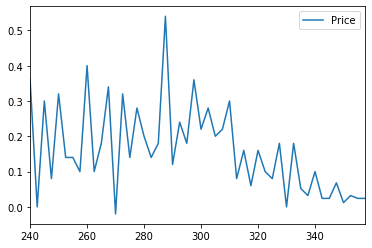

In [43]:
df = pd.DataFrame({'Price':prices}, index=Ks)
df.plot()

### Develop a function that can do the same with any stock.
- Can determine what value of lambda to use
- Can determine what values of K to use
    - based on the current stock price

In [47]:
msft = yf.Ticker("MSFT")

In [50]:
hist = msft.history(period="1d")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-24,167.51,167.53,164.45,165.04,24903000,0,0
2020-01-24,167.51,167.53,164.45,165.04,20904876,0,0


In [49]:
msft_oc = oc.get_options_chain('MSFT', date='2020-01-31')
calls = pd.DataFrame(msft_oc['calls'])
calls.head()

1580428800
2020-01-31 00:00:00
https://finance.yahoo.com/quote/MSFT/options?p=MSFT&date=1580428800


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,MSFT200131C00115000,2020-01-06 10:08AM EST,115.0,42.65,52.4,52.55,0.0,-,1,1,238.48%
1,MSFT200131C00120000,2020-01-16 3:54PM EST,120.0,47.40,47.4,47.55,0.0,-,1,11,216.89%
2,MSFT200131C00125000,2019-12-20 10:38AM EST,125.0,42.40,42.4,42.55,0.0,-,1,5,195.95%
3,MSFT200131C00130000,2020-01-23 11:51AM EST,130.0,35.75,37.3,37.60,0.0,-,16,2,174.95%
4,MSFT200131C00132000,2020-01-21 11:50AM EST,132.0,35.80,35.3,35.70,0.0,-,-,-,168.07%


In [85]:
from IPython.display import display

In [95]:
ticker='AAPL'
option_prices = oc.get_options_chain(ticker, date='2020-01-31')
calls = pd.DataFrame(option_prices['calls'])
l = 1/(calls['Strike'].iloc[1] - calls['Strike'].iloc[0])
stock_price = yf.Ticker(ticker).history(period="1d")['Close'].iloc[0]

# Calculate the closest strike price to the current strike price
diffs = []
prices = []
strikes = []
for x in np.arange(0,stock_price+2*(1/l), 1/l):
    diffs.append(stock_price-x)
    prices.append(stock_price)
    strikes.append(x)
data = pd.DataFrame({'Differences':diffs,
                     'Stock Price':prices,
                     'Strikes':strikes})
data['Differences'] = np.abs(data['Differences'])
mid_strike_price = data['Strikes'].iloc[data['Differences'].idxmin()]

display(data)
Ks = np.arange(mid_strike_price-10*l, mid_strike_price+11*(1/l), 1/l)
prices = []
print(Ks)
print(l)
print(mid_strike_price)



    

1580428800
2020-01-31 00:00:00
https://finance.yahoo.com/quote/AAPL/options?p=AAPL&date=1580428800


,Differences,Stock Price,Strikes
0,318.31,318.31,0.0
1,313.31,318.31,5.0
2,308.31,318.31,10.0
3,303.31,318.31,15.0
4,298.31,318.31,20.0
...,...,...,...
61,13.31,318.31,305.0
62,8.31,318.31,310.0
63,3.31,318.31,315.0
64,1.69,318.31,320.0


[318. 323. 328. 333. 338. 343. 348. 353. 358. 363. 368. 373.]
0.2
320.0


In [147]:
Ks[0]

318.0

In [146]:
calls[calls['Strike']==Ks[0]-1/l]['Ask'].values*l

array([], dtype=float64)

In [ ]:
for K in Ks:
    asset1_cost = float(calls[calls['Strike']==K-1/l]['Ask'].values)*l
    asset2_cost = float(calls[calls['Strike']==K]['Bid'].values)*l
    asset3_cost = float(calls[calls['Strike']==K+1/l]['Ask'].values)*l
    portfolio_cost = asset1_cost - 2*asset2_cost + asset3_cost
    prices.append(portfolio_cost)
df = pd.DataFrame({'Price':prices}, index=Ks)

In [187]:
def get_butterfly_prices(ticker, date, plus_minus=3, pricing_method='mid'):
    option_prices = oc.get_options_chain(ticker, date=date)
    calls = pd.DataFrame(option_prices['calls'])
    l = 1/(calls['Strike'].iloc[1] - calls['Strike'].iloc[0])
    stock_price = yf.Ticker(ticker).history(period="1d")['Close'].iloc[0]
    # Calculate the closest strike price to the current strike price
    diffs = []
    prices = []
    strikes = []
    for x in np.arange(0,stock_price+2*(1/l), 1/l):
        diffs.append(stock_price-x)
        prices.append(stock_price)
        strikes.append(x)
    data = pd.DataFrame({'Differences':diffs,
                         'Stock Price':prices,
                         'Strikes':strikes})
    data['Differences'] = np.abs(data['Differences'])
    mid_strike_price = data['Strikes'].iloc[data['Differences'].idxmin()]
    
    #display(data)
    # I should dynamically be setting the value for this -6 and positive 7
    Ks = np.arange(mid_strike_price-plus_minus*(1/l), mid_strike_price+plus_minus*(1/l)+(1/l), 1/l)
    prices = []
    #print(Ks)
    #print(l)
    #print(mid_strike_price)
    if pricing_method == 'real':
        for K in Ks:
            #display(calls)
            asset1_cost = float(calls[calls['Strike']==K-1/l]['Ask'].values)*l
            asset2_cost = float(calls[calls['Strike']==K]['Bid'].values)*l
            asset3_cost = float(calls[calls['Strike']==K+1/l]['Ask'].values)*l
            portfolio_cost = asset1_cost - 2*asset2_cost + asset3_cost
            prices.append(portfolio_cost)
    if pricing_method == 'mid':
        for K in Ks:
            #display(calls)
            asset1_cost = float((calls[calls['Strike']==K-1/l]['Bid'].values+calls[calls['Strike']==K-1/l]['Ask'].values)*l/2)
            asset2_cost = float((calls[calls['Strike']==K]['Bid'].values+calls[calls['Strike']==K]['Ask'].values)*l/2)
            asset3_cost = float((calls[calls['Strike']==K+1/l]['Bid'].values+calls[calls['Strike']==K+1/l]['Ask'].values)*l/2)
            portfolio_cost = asset1_cost - 2*asset2_cost + asset3_cost
            prices.append(portfolio_cost)
    df = pd.DataFrame({'Price':prices}, index=Ks)
    return df  

1610668800
2021-01-15 00:00:00
https://finance.yahoo.com/quote/QQQ/options?p=QQQ&date=1610668800


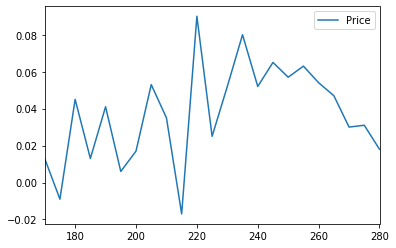

In [203]:
df = get_butterfly_prices(ticker='QQQ', date='2021-01-15', plus_minus=11)
df.plot()

from $-\frac{\partial C_K}{\partial K}$ = $D_K(t, T) = Z(t, T)\mathbf{E}[I\{S_T>K\} | S_t] = Z(t, T)P(S_T>K)$,
- we can see that the price of the digital is the probability of the event suitably discounted
- we also see that the derivative of the call price with respect to the strike price equals the discounted probability of the stock being above K
- We can reorganize this to get cumulative distribution function (which is $1-P(S_T>K | S_t)$)
- CDF: $P(S_T<K) = 1+\frac{\partial C_K(t,T)}{\partial K}\frac{1}{Z(t,T)}$
    - Differentiate the CDF to get the PDF
- Let $f_{S_T}(x)$ be the probability density function of random variable $S_T$, the the price of the stock at time $t=T$
    - $f_{S_T}(x) = \frac{\partial^{2} C_K}{Z(t,T)\partial K^{2}} |_x$
- We now have a linkage between the call price of options and the density of the random variable that is the underlying stock price at $t=T$
    - Given the set of call prices for all K, I can then uniquely determine the density of the underlying asset price at time $t=T$
        - {$C_K(t,T); \forall K$} $-> f_{S_T | S_t}(x)$

### We went from option prices to probability. Now let's go from probability to option price.

FTAP: For a derivative with payout $D(T,T)=g(S_T)$ and price $D(t,T)$ at $t <= T$
- $D(T,T)$ here could be the digital payout, the call option payout, it could be 1
- The ratio of the price to the zero coupon bond: $\frac{D(t,T)}{Z(t,T)} = E_*[\frac{D(T,T)}{Z(T,T)} | S_t]$ so it is a martingale
    - This ratio is a martingale with respect to the stock price under the risk-neutral distribution
- and remember from before: $D(t,T)=Z(t,T)\mathbf{E}_x[D(T,T) | S_t]$
    - the expected value of a function of a random variable, so we can say the above is equal to:
    - $= Z(t,T)\int g(x)f_{S_T | S_t}(x)dx$ where $g(x)$ is the call option payout
    
FTAP: We can go from the probability density to the price of a derivative, for any derivative
- $f(x) -> D(t,T)

So now we can go either way: Density to derivative or call price to density.
- But remember we needed the call prices to get the density
- to go from the call price to an arbitrary derivative price, just go via the density.

In particular, knowledge of all the call prices for all K determines the derivative payout for any $g$
- {$C_K(t,T), \forall K$} determines $D(t,T)$
- So if I know all calls, I know the density. And then if I know the density, I know an arbitrary derivative price.
    - It's obvious as we stated here. But what this is saying is, the call options often are introduced as this-- why are they important?-- are the spanning set of all derivative prices. Call prices span all derivative prices. And they are a particular type of derivative prices that are determined exactly by their payout at maturity. European derivative prices are determined by calls.
    
There's two other ways of looking at this. If I think about my function g( ), so it defines the derivative by its payout at maturity. Let's graph it. Assumes it's piecewise linear. The area under the curve is 1. I can also replicate this options by a portfolio of calls, a linear combination of calls. If I can replicate the payout exactly at maturity, the price at time $t$ of this derivative must be the price at $t$ of the replicating portfolio. Since a piecewise linear function can replicate any function, a derivative's payout function can be replicated with call options

Let's write down an exact Taylor Series to the second order. For any function with second derivative.
- $g(x) = g(0) + xg'(0) + \int_{0}^{\inf} (x-c)^{+}g''(c)dc$ where c is my dummy variable. And + max notation. Max between what's inside the parenthesis and zero. Take the dummy variable c which we're integrating over from 0 to infinity and call it K.
- $g(x) = g(0) + xg'(0) + \int_{0}^{\inf} (x-K)^{+}g''(K)dK$
    - $(x-K)^{+}$ now looks like the payout of a call option

Remember, if I want to actually get the call price, I take the expected value of this $\int_{0}^{\inf} (x-K)^{+}$
- I integrate over x with respect to its density. $\int_{0}^{\inf} (x-K)^{+}$ is $g$ of a payout function of x
- With $g''(K)dK$ I'm integrating over K, so I'm doing something a bit different, but $\int_{0}^{\inf} (x-K)^{+}$ is the call option payout.

Now replace x with my random variable $S_T$ to get:
$g(S_T) = g(0)+S_T g'(0) + \int_{0}^{\inf} (S_T-K)^{+}g''(K)dK$

Take the discounted expected value of each side. Note that the discounted expected value is the price.

$Z(t,T)\mathbf{E}[\cdot | S_t]$

$D(t,T)$ becomes the price of the derivative with payout of $g(S_T)$ at maturity.
- $D(t,T) = g(S_T) = Z(t,T)g(0) + g'(0)S_t + \int_{0}^{\inf} C_K(t,T)g''(K)dK$
    - $Z(t,T)g(0)$ is a constant
    - $S_t$ is the price of the stock at time $t$
    - $C_K(t,T)$ is equal to the discounted expected payout of $Z(t,T)E_{*}[\cdot | S_t]$ with strike $K$
    
The above equation says explicitly now, how do I replicate an arbitrary derivative product with payout $g(x)$ or $g(S)$ at maturity? The answer is clear. I replicate it by:
- $g(0)$ zero-coupon bonds. Just the intercept of $g$.
- $g'(0)$ of stock. Just the slope of $g$ at $0$.
- and this $\int_{0}^{\inf} C_K(t,T)g''(K)dK$ linear combination of calls

So this is sort of looking at the duality of option prices and probabilities in different ways. But then also how calls span everything. So the calls, in some sense, are the primitive information. Once I know all call option prices, I know the probability distribution exactly.

So there are a couple of sort of interesting further questions you might want to pose. We seem to have done everything here with regard to the distribution at time capital T. And that's true. If I know all the calls, I know the distribution at time capital T. If I know all the calls, I know the price of any options with a payout defined solely by a function at capital T. But I said nothing about the path that takes the stock from today until capital T.

Left off at 1:10:00